## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import math


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20).reshape(50,1)
a = -1,
b = 2
y =( a*x+ b)

In [3]:
x

array([[ 0.        ],
       [ 0.40816327],
       [ 0.81632653],
       [ 1.2244898 ],
       [ 1.63265306],
       [ 2.04081633],
       [ 2.44897959],
       [ 2.85714286],
       [ 3.26530612],
       [ 3.67346939],
       [ 4.08163265],
       [ 4.48979592],
       [ 4.89795918],
       [ 5.30612245],
       [ 5.71428571],
       [ 6.12244898],
       [ 6.53061224],
       [ 6.93877551],
       [ 7.34693878],
       [ 7.75510204],
       [ 8.16326531],
       [ 8.57142857],
       [ 8.97959184],
       [ 9.3877551 ],
       [ 9.79591837],
       [10.20408163],
       [10.6122449 ],
       [11.02040816],
       [11.42857143],
       [11.83673469],
       [12.24489796],
       [12.65306122],
       [13.06122449],
       [13.46938776],
       [13.87755102],
       [14.28571429],
       [14.69387755],
       [15.10204082],
       [15.51020408],
       [15.91836735],
       [16.32653061],
       [16.73469388],
       [17.14285714],
       [17.55102041],
       [17.95918367],
       [18

In [4]:
y

array([[  2.        ],
       [  1.59183673],
       [  1.18367347],
       [  0.7755102 ],
       [  0.36734694],
       [ -0.04081633],
       [ -0.44897959],
       [ -0.85714286],
       [ -1.26530612],
       [ -1.67346939],
       [ -2.08163265],
       [ -2.48979592],
       [ -2.89795918],
       [ -3.30612245],
       [ -3.71428571],
       [ -4.12244898],
       [ -4.53061224],
       [ -4.93877551],
       [ -5.34693878],
       [ -5.75510204],
       [ -6.16326531],
       [ -6.57142857],
       [ -6.97959184],
       [ -7.3877551 ],
       [ -7.79591837],
       [ -8.20408163],
       [ -8.6122449 ],
       [ -9.02040816],
       [ -9.42857143],
       [ -9.83673469],
       [-10.24489796],
       [-10.65306122],
       [-11.06122449],
       [-11.46938776],
       [-11.87755102],
       [-12.28571429],
       [-12.69387755],
       [-13.10204082],
       [-13.51020408],
       [-13.91836735],
       [-14.32653061],
       [-14.73469388],
       [-15.14285714],
       [-15

#### Plot your data points. 

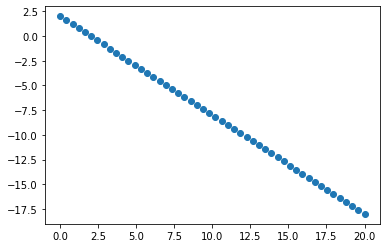

In [5]:
plt.scatter(x,y);

### helpfull funtions

In [6]:
def predict_h(X_h , Theta_h):
    """
    this function takes the 
    features matrix (mxn) matrix
    and the 
    theata vector (nx1) vactor
    ----
    return the predicted values vector (mx1)
    """
    if (X_h.shape[1] == len(Theta_h)):
        return np.dot(X_h, Theta_h)
    else:
        X_h = np.hstack((np.ones((X_h.shape[0],1)),X_h))
        return np.dot(X_h, Theta_h)

In [7]:
def get_gradient(X_f,Y_f ,Theta_g ):
    """
    this function takes the 
    features matrix (mxn) matrix
    and the 
    theata vector (nx1) vactor
    ------
    it uses the function predict_h()
    -------
    return
    the gradient vector (nx1) vactor
    
    """
    m = X_f.shape[0]
    #np.dot(X_h, Theta_h)
    y_hat = predict_h(X_f, Theta_g)
    loss = y_hat - Y_f
    return (1/m)*np.dot(X_f.T,(loss))

In [8]:
def preparethedata(features,target,batch_size):
    """
    return 
    features
    batch_size 
    No_of_batches 
    full_features 
    full_target
    """
    features = np.hstack((np.ones((features.shape[0],1)),features))
       
    if batch_size == None:
        batch_size = features.shape[0]
        
     #split into batches
    No_of_batches = math.ceil(features.shape[0]/batch_size)
    full_features = np.array_split(features, No_of_batches)
    full_target  = np.array_split(target, No_of_batches)
    return features,batch_size , No_of_batches , full_features , full_target
    

In [9]:
def draw(features, target, theta,theta_0,theta_1,costs,thetas ):
        fig , axs = plt.subplots(3,2, figsize=(12, 12))
        fig.tight_layout(pad=3.0)
        axs[0,0].title.set_text("Best Line")
        axs[0,0].plot(features , predict_h(features , theta) , c='r')
#         if features.shape[0]==2:
        axs[0,0].scatter(features , target)

        axs[0,1].set_xlabel("Iterations")
        axs[0,1].set_ylabel("Cost Function")
        axs[0,1].plot(costs ,  marker="o")

        # thetas vs iteration
        axs[1,0].title.set_text("theta 0 vs costs")
        axs[1,0].set_xlabel("theta 0")
        axs[1,0].set_ylabel("Cost")
        axs[1,0].plot(theta_0,costs , marker="o")

        axs[1,1].title.set_text("theta 1 vs costs")
        axs[1,1].set_xlabel("theta 1")
        axs[1,1].set_ylabel("Cost")
        axs[1,1].plot(theta_1,costs , marker="o")

        # all lines
        axs[2,0].title.set_text("all lines to the end")
        for thet in (thetas):
            axs[2,0].plot(features , predict_h(features , thet))
        
        axs[2,1].axis('off') 

### stop criteria 

In [10]:
def stop_criteria_gradient(grad,limits = 1e-5):
    return np.linalg.norm(grad) <= limits

In [11]:
def stop_criteria_cost(cost, limits = 1e-3):
    return cost<= limits

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

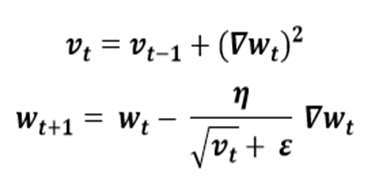

In [12]:
def gradient_descent_with_Adagrad(features , target
                     , number_of_iterations=1000
                     , learning_rate = 0.0001
                     , epsilon = 1e-8 
                     , batch_size = None
                     , grad_limit = 1e-4
                     , cost_limit = 1e-3):
    #creat emppty lists to store history 
    thetas = []
    costs = []
    accuracy = []
    grads = []
    y_hat_history  = []
    
    #to split if needed to batch and add the ones columns to work with the data 
    features,batch_size,No_of_batches,full_features,full_target=preparethedata(features,target,batch_size)
    
    #intialize the theta
    theta = np.zeros(features.shape[1]).reshape((features.shape[1],1))
    
    # intialize Y hat for spliting (it will be only needed if split is active)
    y_hat = full_target.copy()

    # intialize v_Adagrad i knew it's a vector but in intialize it's not needed to be any value
    #thanks goes to numpy ability of cast 
    v_Adagrad = 0
    
    #stop to max iter
    iter_time = 0
    
    #loop over the iterations
    for t in range(number_of_iterations):
        
        #loop over the batches
        for i in range(No_of_batches):
                
            y_hat[i] = predict_h(full_features[i],theta)
            g = get_gradient(full_features[i],full_target[i] ,theta)
            
            ###### start to be unique 
            v_Adagrad = v_Adagrad + g**2
            theta = theta - learning_rate*g*(1/(np.sqrt(v_Adagrad)+epsilon))
            #######
            
            thetas.append(theta)
    
            # for full batch or small batches cases
            if (batch_size >=2):
                y_hat[i] = predict_h(full_features[i],theta)
                
                accuracy.append(round(skm.r2_score(full_target[i],y_hat[i]),6))
                #calc the cost
                m = target.shape[0]
                y_hat_final = predict_h(features,theta)
                y_hat_history.append(y_hat_final)
                loss = y_hat_final - target
                cost = 1/(2*m)*np.sum(loss**2)
                costs.append(cost)
                if stop_criteria_cost(cost, cost_limit):
                    break
                
        
        # for 1 by 1 value (Stochastic)
        if (batch_size <2):
            y_hat = np.dot(features, theta)
            accuracy.append(round(skm.r2_score(target,y_hat),6))
            #calc the cost
            m = target.shape[0]
            y_hat_final = predict_h(features,theta)
            y_hat_history.append(y_hat_final)
            loss = y_hat_final - target
            cost = 1/(2*m)*np.sum(loss**2)
            costs.append(cost)
            if stop_criteria_cost(cost, cost_limit):
                break
            
        iter_time += 1
        
        #get final grad after each iteration to add to list 
        g = get_gradient(full_features[i],full_target[i] ,theta)
        grads.append(g)
        
        if stop_criteria_gradient(g,grad_limit):
            break
        
#     end the for iteration loop
    
    #for extraction purpose 
    thetas = np.array(thetas).reshape(iter_time,features.shape[1])
    theta_0 = np.array(thetas).reshape(len(thetas),2)[:,[0]]
    theta_1 = np.array(thetas).reshape(len(thetas),2)[:,[1]]
    
    
#     #end function 
    return theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history

In [13]:
features = x
target = y

with learing rate 0.01 and the iteration was 1000 and accurucy 0.597561 


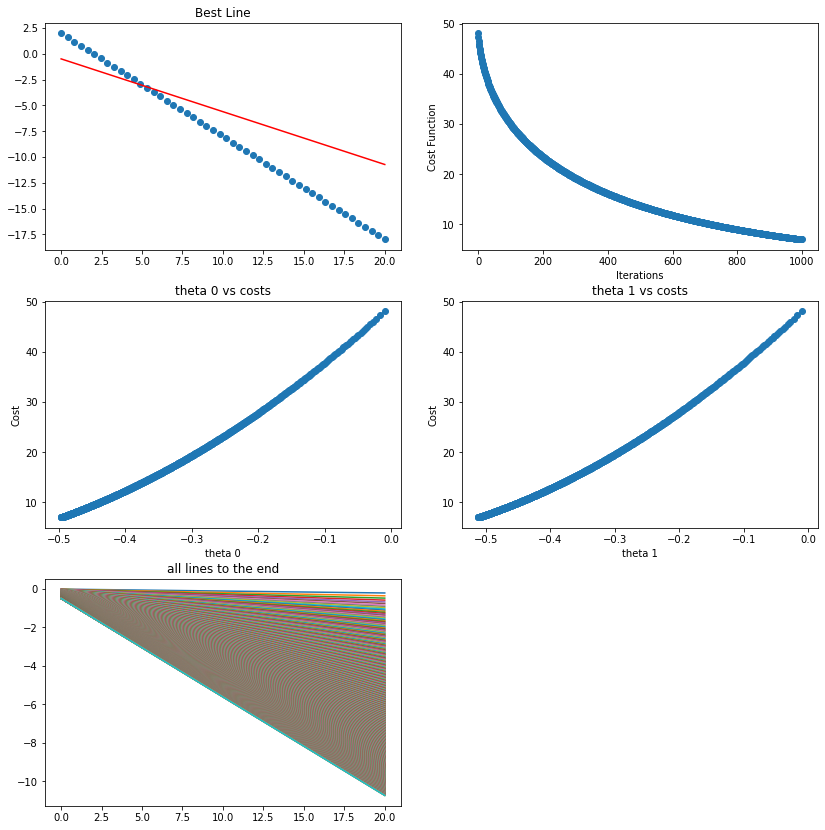

In [14]:
number_of_iterations=1000
learning_rate = 0.01

theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history = gradient_descent_with_Adagrad(features , target
                     ,number_of_iterations=1000
                     , learning_rate = learning_rate
                     , batch_size = None)
accuracy[-1]
print(f'with learing rate {learning_rate} and the iteration was {iter_time} and accurucy {accuracy[-1]} ')
draw(x, y, theta,theta_0,theta_1,costs ,thetas)

with learing rate 0.1 and the iteration was 1000 and accurucy 0.993397 


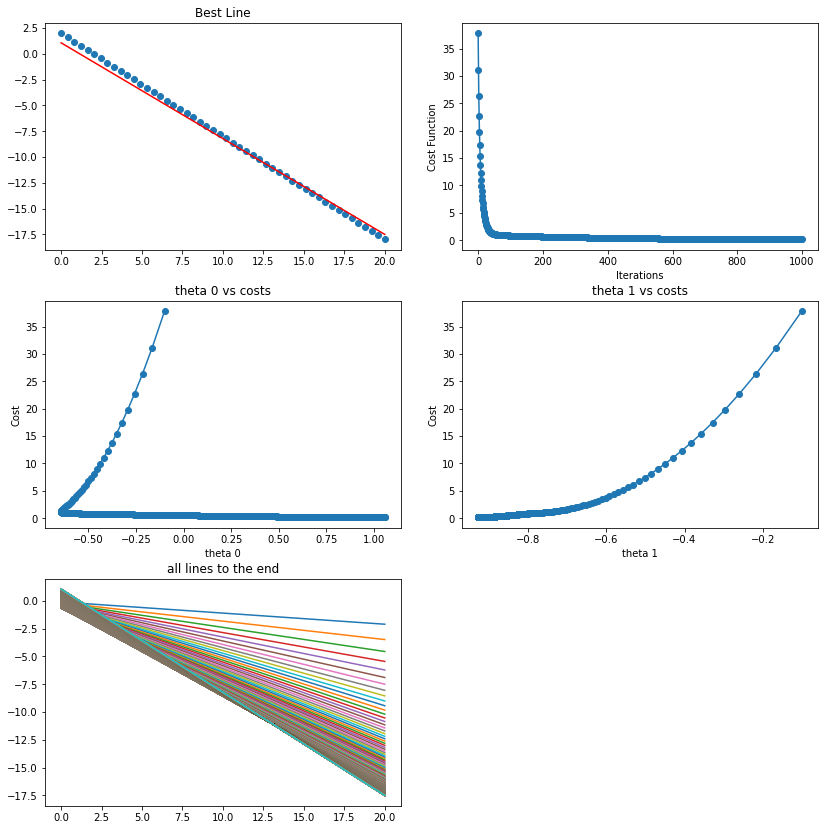

In [15]:
number_of_iterations=1000
learning_rate = 0.1

theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history = gradient_descent_with_Adagrad(features , target
                     ,number_of_iterations=1000
                     , learning_rate = learning_rate
                     , batch_size = None)
accuracy[-1]
print(f'with learing rate {learning_rate} and the iteration was {iter_time} and accurucy {accuracy[-1]} ')
draw(x, y, theta,theta_0,theta_1,costs ,thetas)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

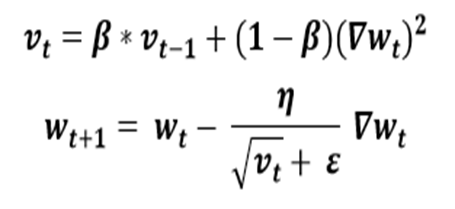

In [16]:
def gradient_descent_with_RMSProp(features , target
                     , number_of_iterations=1000
                     , learning_rate = 0.0001
                     , epsilon = 1e-8 
                     , batch_size = None
                     , beta_rmsprop = .98
                     , grad_limit = 1e-4
                     , cost_limit = 1e-3):
    #creat emppty lists to store history 
    thetas = []
    costs = []
    accuracy = []
    grads = []
    y_hat_history  = []
    
    #to split if needed to batch and add the ones columns to work with the data 
    features,batch_size,No_of_batches,full_features,full_target=preparethedata(features,target,batch_size)
    
    #intialize the theta
    theta = np.zeros(features.shape[1]).reshape((features.shape[1],1))
    
    # intialize Y hat for spliting (it will be only needed if split is active)
    y_hat = full_target.copy()
    
    # intialize v_Adagrad i knew it's a vector but in intialize it's not needed to be any value
    #thanks goes to numpy ability of cast 
    v_rmsprop = 0
    
    #stop to max iter
    iter_time = 0
    
    #loop over the iterations
    for t in range(int(number_of_iterations)):
        
        #loop over the batches
        for i in range(No_of_batches):
                
            y_hat[i] = predict_h(full_features[i],theta)
            g = get_gradient(full_features[i],full_target[i] ,theta)

            #####

            v_rmsprop = beta_rmsprop*v_rmsprop + (1-beta_rmsprop)*g**2

            theta = theta - learning_rate*g*(1/(np.sqrt(v_rmsprop)+1e-5))
            thetas.append(theta)
            ###
    
            # for full batch or small batches cases
            if (batch_size >=2):
                y_hat[i] = predict_h(full_features[i],theta)
                
                accuracy.append(round(skm.r2_score(full_target[i],y_hat[i]),6))
                #calc the cost
                m = target.shape[0]
                y_hat_final = predict_h(features,theta)
                y_hat_history.append(y_hat_final)
                loss = y_hat_final - target
                cost = 1/(2*m)*np.sum(loss**2)
                costs.append(cost)
                if stop_criteria_cost(cost, cost_limit):
                    break
                
        
        # for 1 by 1 value (Stochastic)
        if (batch_size <2):
            y_hat = np.dot(features, theta)
            accuracy.append(round(skm.r2_score(target,y_hat),6))
            #calc the cost
            m = target.shape[0]
            y_hat_final = predict_h(features,theta)
            y_hat_history.append(y_hat_final)
            loss = y_hat_final - target
            cost = 1/(2*m)*np.sum(loss**2)
            costs.append(cost)
            if stop_criteria_cost(cost, cost_limit):
                break
            
        iter_time += 1
        
        #get final grad after each iteration to add to list 
        g = get_gradient(full_features[i],full_target[i] ,theta)
        grads.append(g)
        
        if stop_criteria_gradient(g,grad_limit):
            break
        
#     end the for iteration loop
    
    #for extraction purpose 
    thetas = np.array(thetas).reshape(iter_time,features.shape[1])
    theta_0 = np.array(thetas).reshape(len(thetas),2)[:,[0]]
    theta_1 = np.array(thetas).reshape(len(thetas),2)[:,[1]]
    
    
#     #end function 
    return theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history

In [17]:
number_of_iterations=1000
learning_rate = 0.01
beta_rmsprop = .98

theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history = gradient_descent_with_RMSProp(features , target
                     ,number_of_iterations=1000
                     , learning_rate = learning_rate
                     , beta_rmsprop = .9
                     , batch_size = None)
accuracy[-1]
print(f'with learing rate {learning_rate} and beta_rmsprop = {beta_rmsprop} the iteration was {iter_time} and accurucy {accuracy[-1]} ')

with learing rate 0.01 and beta_rmsprop = 0.98 the iteration was 1000 and accurucy 0.999888 


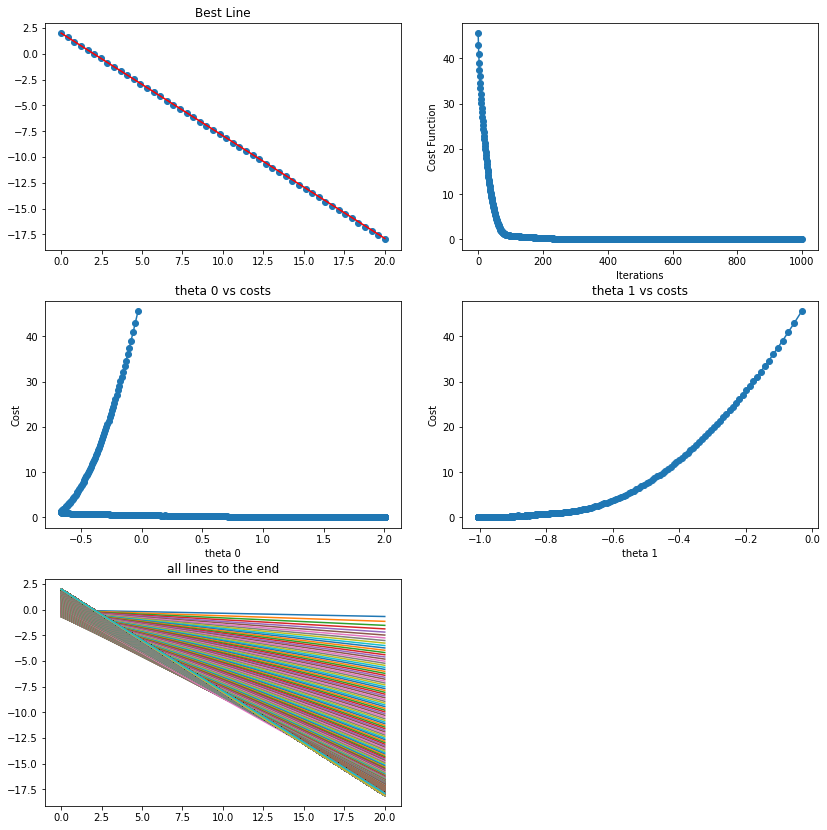

In [18]:
draw(x, y, theta,theta_0,theta_1,costs ,thetas)

In [19]:
number_of_iterations=1000
learning_rate = 0.001
beta_rmsprop = .5

theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history = gradient_descent_with_RMSProp(features , target
                     ,number_of_iterations=1000
                     , learning_rate = learning_rate
                     , beta_rmsprop = .9
                     , batch_size = None)
accuracy[-1]
print(f'with learing rate {learning_rate} and beta_rmsprop = {beta_rmsprop} the iteration was {iter_time} and accurucy {accuracy[-1]} ')

with learing rate 0.001 and beta_rmsprop = 0.5 the iteration was 1000 and accurucy 0.955782 


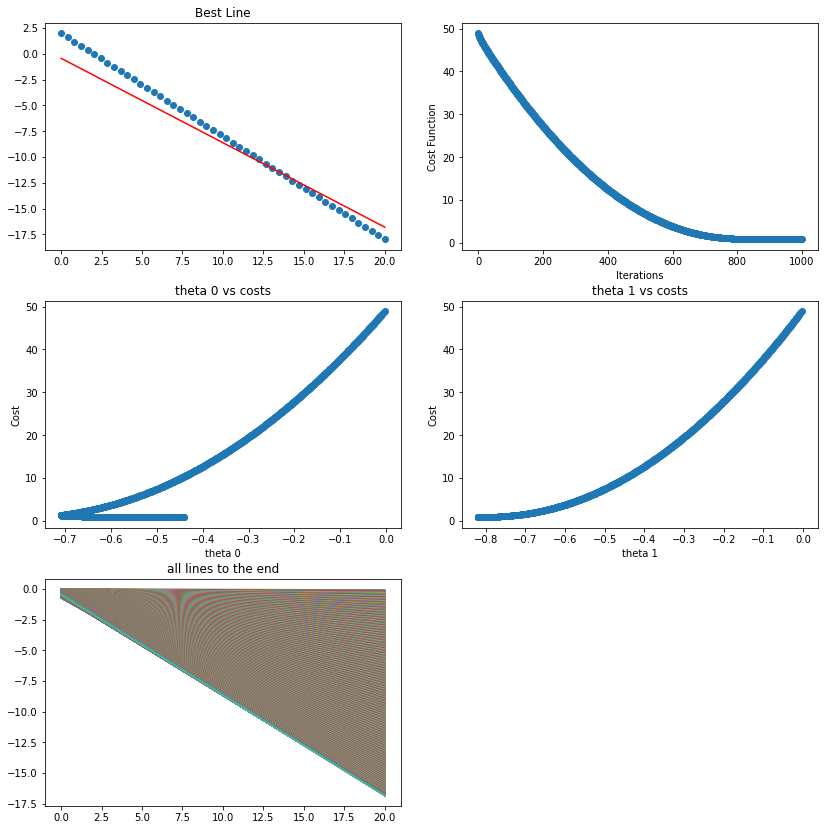

In [20]:
draw(x, y, theta,theta_0,theta_1,costs ,thetas)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

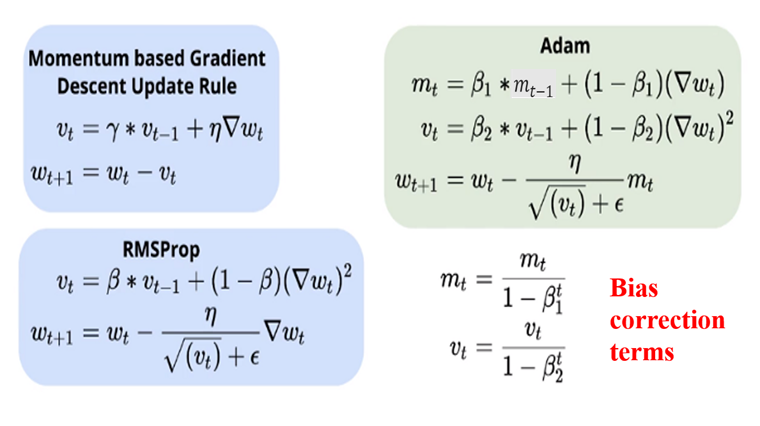

In [21]:
def gradient_descent_with_adam(features , target
                     , number_of_iterations=1000
                     , learning_rate = 0.0001
                     , epsilon = 1e-8 
                     , batch_size = None
                    , beta_mAdam = 0
                     , beta_vAdam = 1
                     , grad_limit = 1e-4
                     , cost_limit = 1e-3):
    #creat emppty lists to store history 
    thetas = []
    costs = []
    accuracy = []
    grads = []
    y_hat_history  = []
    
    #to split if needed to batch and add the ones columns to work with the data 
    features,batch_size,No_of_batches,full_features,full_target=preparethedata(features,target,batch_size)
    
    #intialize the theta
    theta = np.zeros(features.shape[1]).reshape((features.shape[1],1))
    
    # intialize Y hat for spliting (it will be only needed if split is active)
    y_hat = full_target.copy()
    
    # intialize v_Adagrad i knew it's a vector but in intialize it's not needed to be any value
    #thanks goes to numpy ability of cast 
    v_adam = 0
    m_adam = 0
    
    #stop to max iter
    iter_time = 0
    
    #loop over the iterations
    for t in range(number_of_iterations):
        
        #loop over the batches
        for i in range(No_of_batches):
                
            y_hat[i] = predict_h(full_features[i],theta)
            g = get_gradient(full_features[i],full_target[i] ,theta)

            #####
            v_adam = v_adam /(1  -beta_vAdam**(t+2) )
            m_adam = m_adam / (1- beta_mAdam**(t+2))
            v_adam = beta_vAdam*v_adam + (1-beta_vAdam)*g**2
            m_adam = beta_mAdam*m_adam + (1-beta_mAdam)*g
            theta = theta - learning_rate*m_adam*(1/(np.sqrt(v_adam)+1e-5))
            thetas.append(theta)
            ###
    
            # for full batch or small batches cases
            if (batch_size >=2):
                y_hat[i] = predict_h(full_features[i],theta)
                
                accuracy.append(round(skm.r2_score(full_target[i],y_hat[i]),6))
                #calc the cost
                m = target.shape[0]
                y_hat_final = predict_h(features,theta)
                y_hat_history.append(y_hat_final)
                loss = y_hat_final - target
                cost = 1/(2*m)*np.sum(loss**2)
                costs.append(cost)
                if stop_criteria_cost(cost, cost_limit):
                    break
                
        
        # for 1 by 1 value (Stochastic)
        if (batch_size <2):
            y_hat = np.dot(features, theta)
            accuracy.append(round(skm.r2_score(target,y_hat),6))
            #calc the cost
            m = target.shape[0]
            y_hat_final = predict_h(features,theta)
            y_hat_history.append(y_hat_final)
            loss = y_hat_final - target
            cost = 1/(2*m)*np.sum(loss**2)
            costs.append(cost)
            if stop_criteria_cost(cost, cost_limit):
                break
            
        iter_time += 1
        
        #get final grad after each iteration to add to list 
        g = get_gradient(full_features[i],full_target[i] ,theta)
        grads.append(g)
        
        if stop_criteria_gradient(g,grad_limit):
            break
        
#     end the for iteration loop
    
    #for extraction purpose 
    thetas = np.array(thetas).reshape(iter_time,features.shape[1])
    theta_0 = np.array(thetas).reshape(len(thetas),2)[:,[0]]
    theta_1 = np.array(thetas).reshape(len(thetas),2)[:,[1]]
    
    
#     #end function 
    return theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history

with learing rate 0.1 and beta_mAdam = 0.9 and beta_vAdam 0.9 the iteration was 482 and accurucy 1.0 


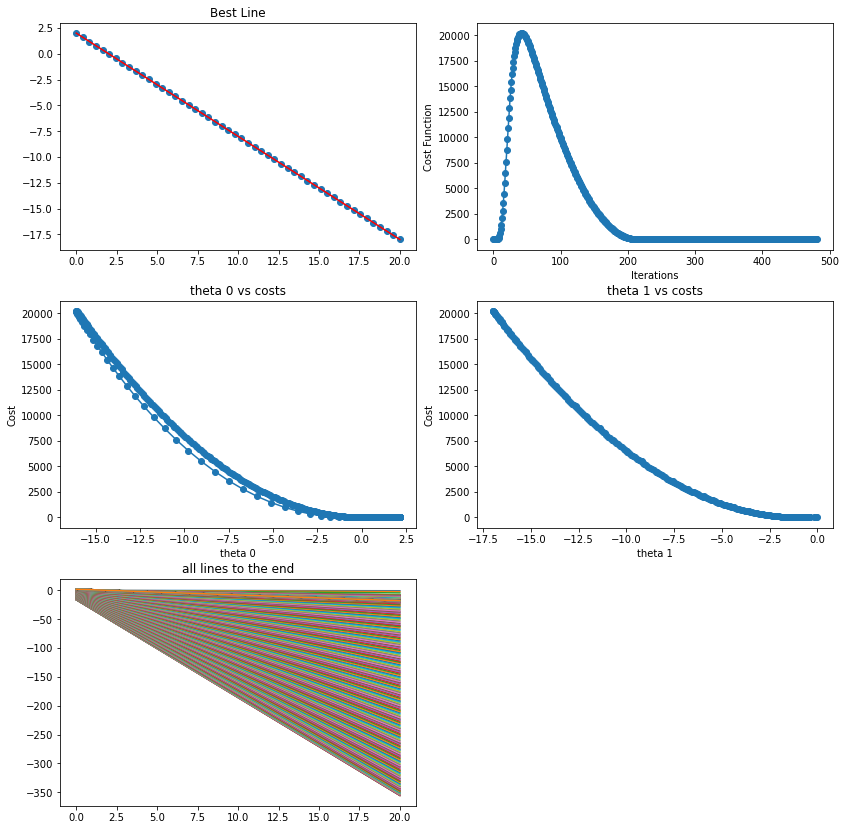

In [22]:
number_of_iterations=1000
learning_rate = 0.1
beta_mAdam = .9
beta_vAdam = .9
theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history = gradient_descent_with_adam(features , target
                     , number_of_iterations=1000
                     , learning_rate = learning_rate
                     , epsilon = 1e-8 
                     , batch_size = None
                    , beta_mAdam = beta_mAdam
                     , beta_vAdam = beta_vAdam
                     , grad_limit = 1e-4
                     , cost_limit = 1e-3)
accuracy[-1]
print(f'with learing rate {learning_rate} and beta_mAdam = {beta_mAdam} and beta_vAdam {beta_vAdam} the iteration was {iter_time} and accurucy {accuracy[-1]} ')
draw(x, y, theta,theta_0,theta_1,costs ,thetas)

with learing rate 0.001 and beta_rmsprop = 0.5 the iteration was 1000 and accurucy 0.953336 


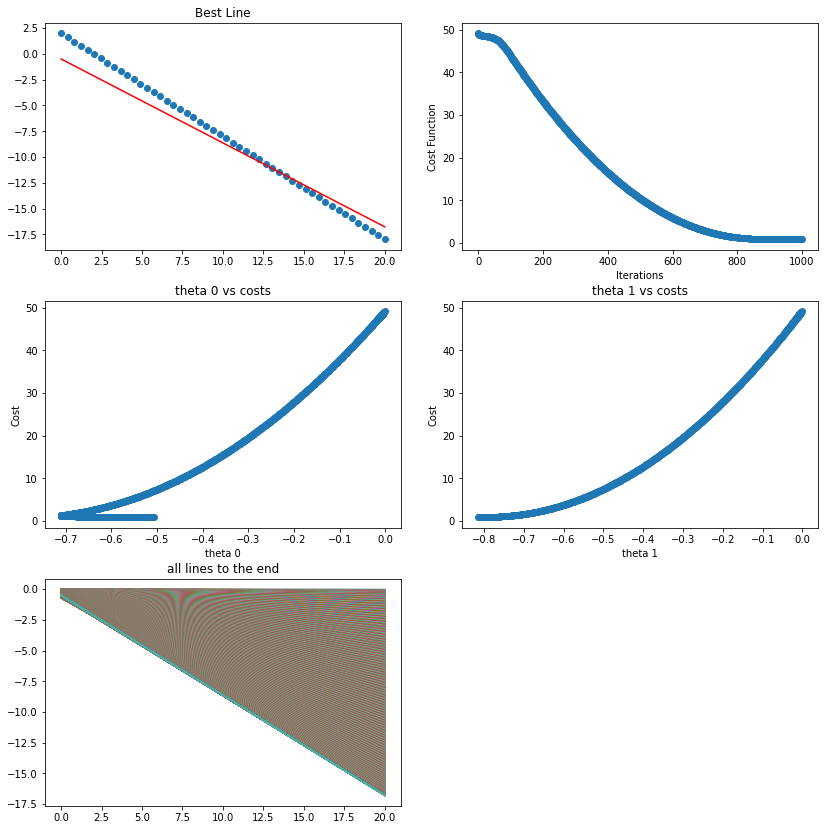

In [23]:
number_of_iterations=1000
learning_rate = 0.001

theta, theta_0, theta_1, thetas, costs, accuracy, iter_time, grads, y_hat_history = gradient_descent_with_adam(features , target
                     , number_of_iterations=1000
                     , learning_rate = learning_rate
                     , epsilon = 1e-8 
                     , batch_size = None
                    , beta_mAdam = .5
                     , beta_vAdam = .9
                     , grad_limit = 1e-4
                     , cost_limit = 1e-3)
accuracy[-1]
print(f'with learing rate {learning_rate} and beta_rmsprop = {beta_rmsprop} the iteration was {iter_time} and accurucy {accuracy[-1]} ')
draw(x, y, theta,theta_0,theta_1,costs ,thetas)

### comparison

In [24]:
learning_rate = .01
beta_rmsprop  = beta_vAdam  = .9
beta_mAdam  = .9

thetaAdagrad, theta_0Adagrad, theta_1Adagrad, thetasAdagrad, costsAdagrad, accuracyAdagrad, iter_timeAdagrad, gradsAdagrad, y_hat_historyAdagrad = gradient_descent_with_Adagrad(features , target
                     ,number_of_iterations=1000
                     , learning_rate = learning_rate
                     , batch_size = None)

thetaRMSProp, theta_0RMSProp, theta_1RMSProp, thetasRMSProp, costsRMSProp, accuracyRMSProp, iter_timeRMSProp, gradsRMSProp, y_hat_historyRMSProp = gradient_descent_with_RMSProp(features , target
                     ,number_of_iterations=1000
                     , learning_rate = learning_rate
                     , beta_rmsprop = beta_rmsprop  
                     , batch_size = None)


thetaadam, theta_0adam, theta_1adam, thetasadam, costsadam, accuracyadam, iter_timeadam, gradsadam, y_hat_historyadam = gradient_descent_with_adam(features , target
                     , number_of_iterations=1000
                     , learning_rate = learning_rate
                     , epsilon = 1e-8 
                     , batch_size = None
                    , beta_mAdam = beta_mAdam
                     , beta_vAdam = beta_vAdam
                     , grad_limit = 1e-4
                     , cost_limit = 1e-3)

In [25]:
print(f"""For AdaGrad, Accuracy: {accuracyAdagrad[-1]*100} 
For RMSProp, Accuracy: {accuracyRMSProp[-1]}
For Adam, Accuracy: {accuracyadam[-1]}""")

For AdaGrad, Accuracy: 59.7561 
For RMSProp, Accuracy: 0.999888
For Adam, Accuracy: 0.999999


(0.0, 1.0, 0.0, 1.0)

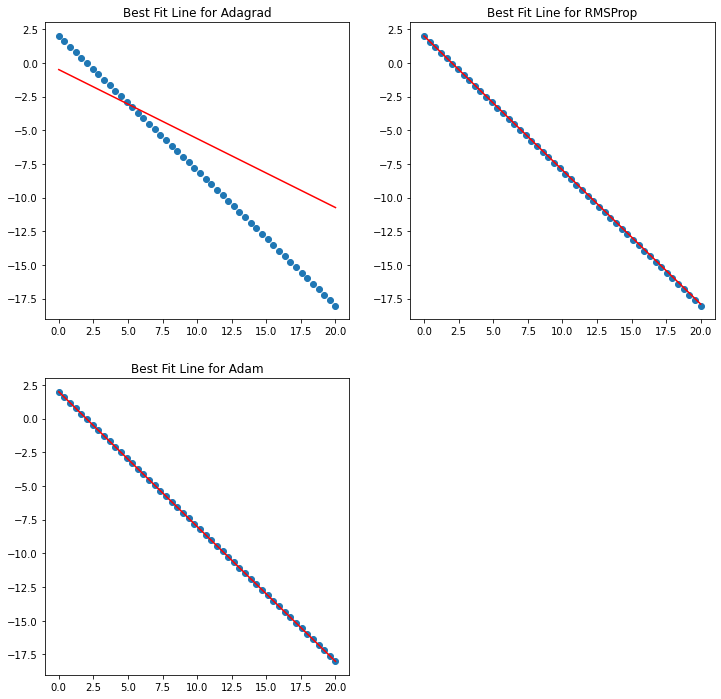

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].title.set_text("Best Fit Line for Adagrad")
axs[0,0].plot(x, y_hat_historyAdagrad[-1] , c='r')
axs[0,0].scatter(x, y)

axs[0,1].title.set_text("Best Fit Line for RMSProp")
axs[0,1].plot(x, y_hat_historyRMSProp[-1] , c='r')
axs[0,1].scatter(x, y)

axs[1,0].title.set_text("Best Fit Line for Adam")
axs[1,0].plot(x,y_hat_historyadam[-1]  , c='r')
axs[1,0].scatter(x, y)


axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

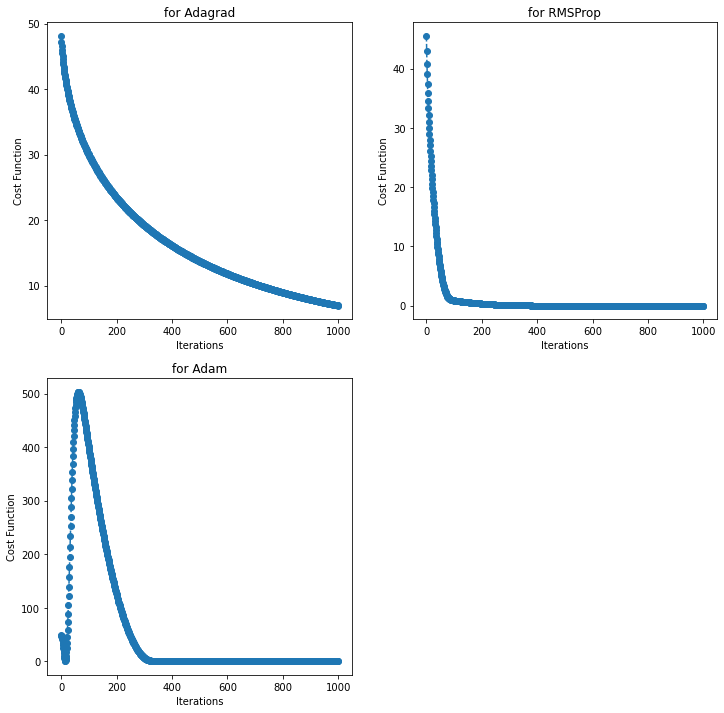

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].title.set_text("for Adagrad")
axs[0,0].set_xlabel("Iterations")
axs[0,0].set_ylabel("Cost Function")
axs[0,0].plot(costsAdagrad, marker='o', linestyle="dashed")

axs[0,1].title.set_text("for RMSProp")
axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(costsRMSProp, marker='o', linestyle="dashed")

axs[1,0].title.set_text("for Adam")
axs[1,0].set_xlabel("Iterations")
axs[1,0].set_ylabel("Cost Function")
axs[1,0].plot(costsadam, marker='o', linestyle="dashed")

axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

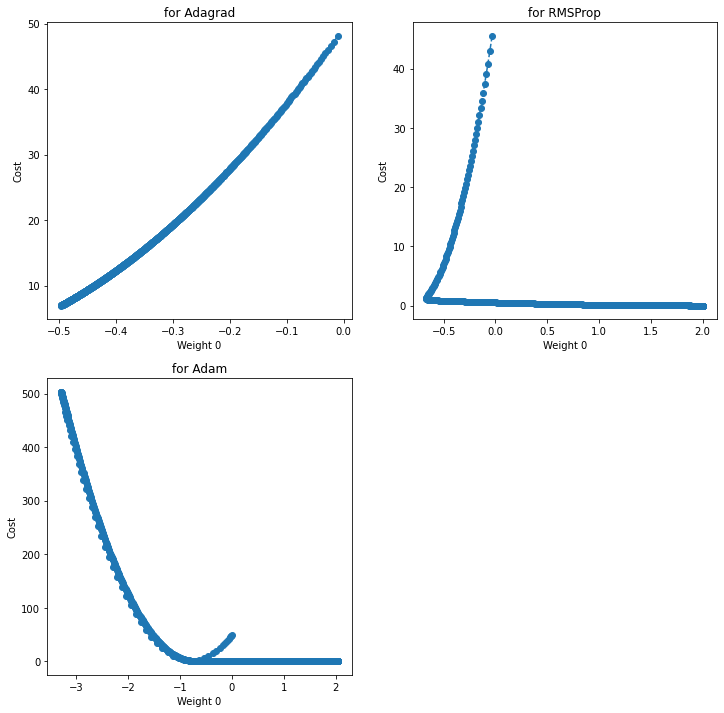

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].title.set_text("for Adagrad")
axs[0,0].set_xlabel("Weight 0")
axs[0,0].set_ylabel("Cost")
axs[0,0].plot(theta_0Adagrad, costsAdagrad , marker="o", linestyle="dashed")

axs[0,1].title.set_text("for RMSProp")
axs[0,1].set_xlabel("Weight 0")
axs[0,1].set_ylabel("Cost")
axs[0,1].plot(theta_0RMSProp,  costsRMSProp , marker="o", linestyle="dashed")

axs[1,0].title.set_text("for Adam")
axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0adam, costsadam , marker="o", linestyle="dashed")
axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

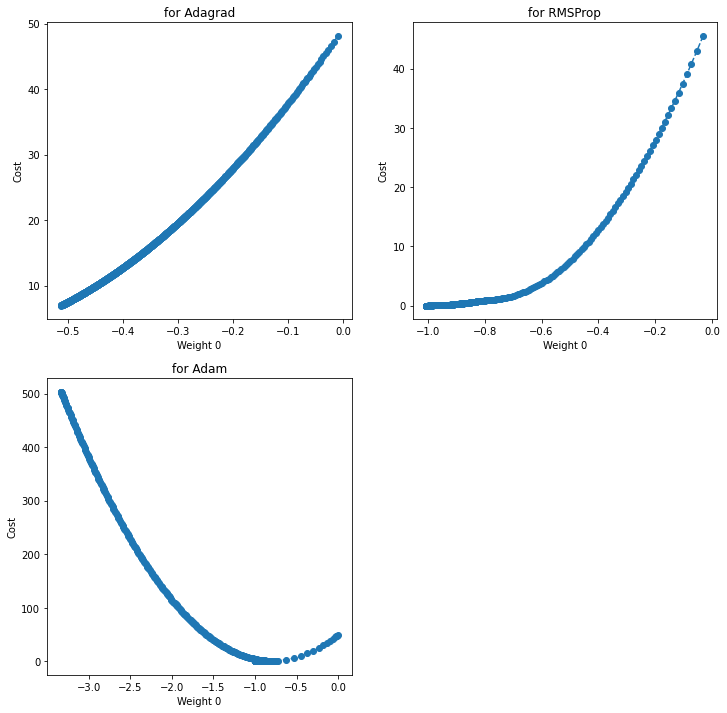

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].title.set_text("for Adagrad")
axs[0,0].set_xlabel("Weight 0")
axs[0,0].set_ylabel("Cost")
axs[0,0].plot(theta_1Adagrad, costsAdagrad , marker="o", linestyle="dashed")

axs[0,1].title.set_text("for RMSProp")
axs[0,1].set_xlabel("Weight 0")
axs[0,1].set_ylabel("Cost")
axs[0,1].plot(theta_1RMSProp,  costsRMSProp , marker="o", linestyle="dashed")

axs[1,0].title.set_text("for Adam")
axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_1adam, costsadam , marker="o", linestyle="dashed")
axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

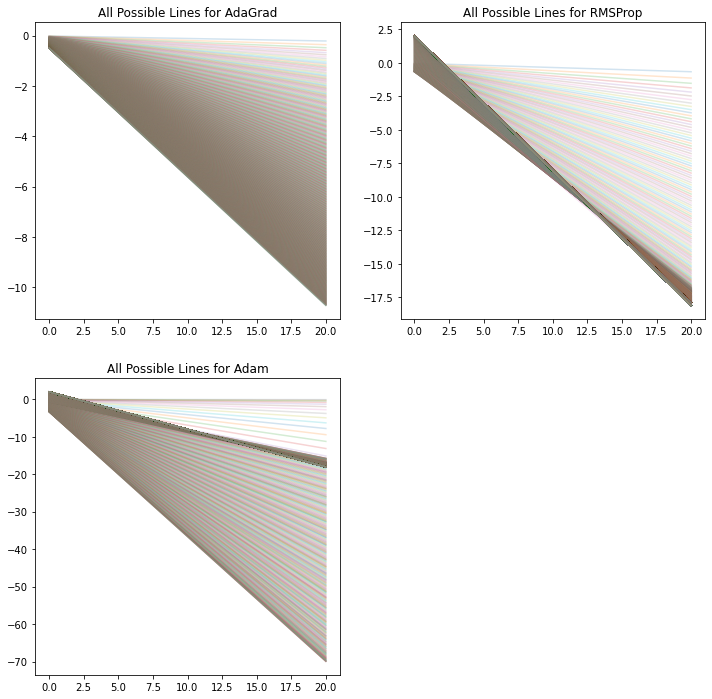

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].title.set_text("All Possible Lines for AdaGrad")
for i in range(len(y_hat_historyAdagrad )):
    axs[0,0].plot(x, y_hat_historyAdagrad [i], alpha=0.2)
    
axs[0,1].title.set_text("All Possible Lines for RMSProp")
for i in range(len(y_hat_historyRMSProp )):
    axs[0,1].plot(x, y_hat_historyRMSProp [i], alpha=0.2)
    
axs[1,0].title.set_text("All Possible Lines for Adam")
for i in range(len(y_hat_historyadam )):
    axs[1,0].plot(x, y_hat_historyadam [i], alpha=0.2)

axs[1,1].axis("off")

## Congratulations 
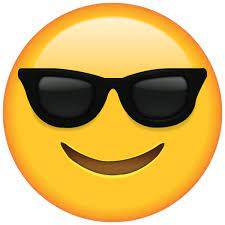